In [14]:
# Import statements

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import signal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Loading the Data

Our team decided to use channels 2, 3 and 4. Fz, Cz, Pz, respectively.

In [15]:
pre_eeg = pd.read_csv('data/precaff/emily_precaff.csv', sep='\t', header=0, names=['Fz','Cz', 'Pz'], usecols=[1,2,3])         

In [16]:
pre_eeg.describe()

,Fz,Cz,Pz
count,167894.000000,167894.000000,167894.000000
mean,14360.102270,-12650.551021,-7112.707189
std,923.357754,1783.238476,767.368418
min,11606.590343,-16081.566045,-8805.670894
25%,13822.341123,-14333.324353,-7832.408885
50%,14164.211054,-12275.667462,-6782.849196
75%,14742.830663,-11092.522573,-6460.078831
max,17761.612566,-9844.356459,-6039.642518


In [17]:
post_eeg = pd.read_csv('data/postcaff/emily_postcaff.csv', sep='\t', header=0, names=['Fz','Cz', 'Pz'], usecols=[1,2,3])         

In [18]:
post_eeg.describe()

,Fz,Cz,Pz
count,169188.000000,169188.000000,169188.000000
mean,13369.025647,-3793.168280,-3144.659549
std,312.483969,718.648247,417.904367
min,12661.838551,-5202.480281,-3904.469777
25%,13085.398520,-4408.456911,-3518.745723
50%,13335.598360,-3815.532185,-3152.422983
75%,13668.628176,-3158.284728,-2781.406377
max,14068.836161,-2543.963795,-2397.448110


In [19]:
# Check for null values

print(pre_eeg.isnull().values.any())
print(post_eeg.isnull().values.any())

False
False


In [20]:
pre_fz = pd.DataFrame(pre_eeg['Fz'])
pre_fz

,Fz
0,12165.696879
1,12170.949539
2,12167.976757
3,12173.989376
4,12183.891199
...,...
167889,13635.637001
167890,13627.813891
167891,13638.721542
167892,13641.716676


In [21]:
pre_cz = pd.DataFrame(pre_eeg['Cz'])
pre_cz

,Cz
0,-15949.981326
1,-15945.108646
2,-15945.533329
3,-15947.120303
4,-15947.500282
...,...
167889,-9864.830657
167890,-9872.162029
167891,-9858.706279
167892,-9853.028936


In [22]:
pre_pz = pd.DataFrame(pre_eeg['Pz'])
pre_pz

,Pz
0,-8591.183554
1,-8588.948380
2,-8588.300179
3,-8589.261304
4,-8590.043615
...,...
167889,-6050.751335
167890,-6055.579311
167891,-6045.565730
167892,-6042.458837


In [23]:
post_fz = pd.DataFrame(post_eeg['Fz'])
post_fz

,Fz
0,12937.547319
1,12949.214929
2,12951.830083
3,12944.252842
4,12943.425827
...,...
169183,14013.984980
169184,13998.249352
169185,13986.626445
169186,13971.114334


In [24]:
post_cz = pd.DataFrame(post_eeg['Cz'])
post_cz

,Cz
0,-5157.888551
1,-5145.617443
2,-5140.521245
3,-5152.859408
4,-5161.576588
...,...
169183,-2562.269874
169184,-2560.839362
169185,-2556.614883
169186,-2566.136726


In [26]:
post_pz = pd.DataFrame(post_eeg['Pz'])
post_pz

,Pz
0,-3892.846870
1,-3882.766233
2,-3877.804146
3,-3886.968361
4,-3893.606829
...,...
169183,-2415.038933
169184,-2409.428645
169185,-2401.449073
169186,-2407.528747


# Data Preprocessing

## Drop outliers 

### Pre Fz channel dropped 3433 samples 

In [14]:
'''
Parameters
data: Unfiltered, unepoched data to take in from a single channel
n_std_dev: Number of standard deviations (default is 3)
           The point needs to be greater than or equal to avg +/- n_std_dev to be dropped 
           
epoch_len: Number of samples in each epoch

Returns
drop_epochs: List of the epochs to drop depending on the size of the epoch (default is 175)   
'''

def drop_artifact_epochs(data, num_std_dev=3, epoch_len=175):
    drop_samps=[]
    mean=np.mean(data)
    std=np.std(data)
    
    samp_index=0
    for sample in data:
        #Checks whether distance from sample to mean is greater than equal to number of std devs * std dev.
        #3 is a good number
        if abs(sample - mean) >= num_std_dev * std:
            drop_samps.append(samp_index)
    
        samp_index+=1
    
    ep_index=0
    drop_epochs=set()
    
    for pt in drop_samps:
        ##Finds epoch to drop
        ep_index = int(pt/epoch_len) 
        drop_epochs.add(ep_index)
    
    return drop_epochs

In [31]:
def drop_artifact(data, channel):
    '''
    Input:
    data (pd.DataFrame): Unfiltered, unepoched data to take in from a single channel
    channel (str): Channel column (Fz, Pz, Cz)
    '''
    data = data[np.abs(data[channel]-data[channel].mean()) <= (3*data[channel].std())]
    return data

In [32]:
pre_fz_drop = drop_artifact(pre_fz, 'Fz')
pre_fz_drop

,Fz
0,12165.696879
1,12170.949539
2,12167.976757
3,12173.989376
4,12183.891199
...,...
167889,13635.637001
167890,13627.813891
167891,13638.721542
167892,13641.716676


In [33]:
pre_cz_drop = drop_artifact(pre_cz, 'Cz')
pre_cz_drop

,Cz
0,-15949.981326
1,-15945.108646
2,-15945.533329
3,-15947.120303
4,-15947.500282
...,...
167889,-9864.830657
167890,-9872.162029
167891,-9858.706279
167892,-9853.028936


In [34]:
pre_pz_drop = drop_artifact(pre_pz, 'Pz')
pre_pz_drop

,Pz
0,-8591.183554
1,-8588.948380
2,-8588.300179
3,-8589.261304
4,-8590.043615
...,...
167889,-6050.751335
167890,-6055.579311
167891,-6045.565730
167892,-6042.458837


In [35]:
post_fz_drop = drop_artifact(post_fz, 'Fz')
post_fz_drop

,Fz
0,12937.547319
1,12949.214929
2,12951.830083
3,12944.252842
4,12943.425827
...,...
169183,14013.984980
169184,13998.249352
169185,13986.626445
169186,13971.114334


In [36]:
post_cz_drop = drop_artifact(post_cz, 'Cz')
post_cz_drop

,Cz
0,-5157.888551
1,-5145.617443
2,-5140.521245
3,-5152.859408
4,-5161.576588
...,...
169183,-2562.269874
169184,-2560.839362
169185,-2556.614883
169186,-2566.136726


In [37]:
post_pz_drop = drop_artifact(post_pz, 'Pz')
post_pz_drop

,Pz
0,-3892.846870
1,-3882.766233
2,-3877.804146
3,-3886.968361
4,-3893.606829
...,...
169183,-2415.038933
169184,-2409.428645
169185,-2401.449073
169186,-2407.528747


## Epoch the Data 

In [38]:
#Epoch the data: Each epoch is 10s worth of data, sf = 250 (250samples/sec), 2500 samples in each epoch

def epoch(data, end):
    '''
    n: number of rows
    data: eeg dataframe
    
    Access each epoch using e.g. epoch_data[0] is the first epoch
    '''
    n = int(end*250)
    #split DataFrame into chunks
    epoch_data = [data[i:i+n] for i in range(0,len(data),n)]
    return epoch_data

In [25]:
emily_pre_epoch = epoch(emily_pre_eeg, 10)
emily_post_epoch = epoch(emily_post_eeg, 10)

In [39]:
fz_pre_epoch = epoch(pre_fz_drop, 10)
cz_pre_epoch = epoch(pre_cz_drop, 10)
pz_pre_epoch = epoch(pre_pz_drop, 10)

fz_post_epoch = epoch(post_fz_drop, 10)
cz_post_epoch = epoch(post_cz_drop, 10)
pz_post_epoch = epoch(post_pz_drop, 10)

In [78]:
len(fz_pre_epoch)

66

## Filter the data

In [65]:
def high_filter(data, num_taps=31, hp=0.1, lp=30, fs=250):
    '''
    data: eeg epoch data
    '''
    
    b = signal.firwin(numtaps=num_taps, cutoff=[hp, lp], pass_zero='bandpass', fs=fs)
    data = signal.filtfilt(b, 1, data, axis=0)
    return data

def high_filt(epoch_channel, channel):
    filtered_epochs = []
    for epoch in epoch_channel:
        filtered_epoch = epoch.copy()
        filtered_epoch[channel] = high_filter(epoch[channel])
        filtered_epoch[channel] = filtered_epoch[channel] - np.mean(filtered_epoch[channel])
        filtered_epochs.append(filtered_epoch)
    return filtered_epochs

In [81]:
fz_pre_epoch[1]['Fz']

2500    -308.231795
2501    -297.049300
2502    -287.151118
2503    -279.498677
2504    -274.502902
           ...     
4995    2438.303407
4996    2440.850359
4997    2443.987376
4998    2447.582576
4999    2451.427098
Name: Fz, Length: 2500, dtype: float64

In [66]:
#Filter epoch data pre caff
filt_pre_fz = high_filt(fz_pre_epoch, 'Fz')
filt_pre_cz = high_filt(cz_pre_epoch, 'Cz')
filt_pre_pz = high_filt(pz_pre_epoch, 'Pz')

In [71]:
#Filter epoch data post caff
filt_post_fz = high_filt(fz_post_epoch, 'Fz')
filt_post_cz = high_filt(cz_post_epoch, 'Cz')
filt_post_pz = high_filt(pz_post_epoch, 'Pz')

## PSD Analysis

In [82]:
def psd_plot(data, epoch, channel):
    
    # Define window length (seconds)
    sf = 250
    win = 0.5 * sf
    freqs, psd = signal.welch(data[epoch][channel], sf, nperseg=win)

    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram of Channel " + channel + ' Pre-caff')
    plt.xlim(0,60)
    #plt.xlim([0, freqs.max()])
    sns.despine()

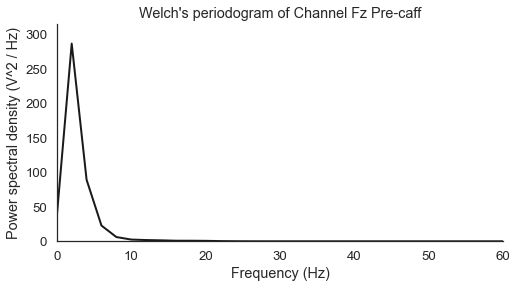

In [83]:
psd_plot(fz_pre_epoch, 0, 'Fz')

In [90]:
 #get fft frequencies for all non-artifactual epochs at once
def fft(channel_epoch, channel):
    sf = 250
    N = len(channel_epoch)
    ratio_df = pd.DataFrame()
    theta_ind = [2]
    alpha_ind = [3]
    beta_ind = [4,5,6,7,8]
    
    for i in range(N):
        freqs, psd = signal.welch(channel_epoch[i][channel], sf, nperseg= N)
        #freqs, psd = fft(epoch[col])
        
        theta = []
        alpha = []
        beta = []
        
        theta = max([psd[i] for i in theta_ind])
        alpha = max([psd[i] for i in alpha_ind])
        beta = max([psd[i] for i in beta_ind])
        

        #Finds ratios from the peaks
        tbr = theta/beta
        abr = alpha/beta
        
        ratio_df.loc[i, 'tbr'] = tbr
        ratio_df.loc[i, 'abr'] = abr
    return ratio_df

In [92]:
fz_pre_ratios = fft(fz_pre_epoch, 'Fz')
fz_pre_ratios['channel'] = 'Fz'
fz_pre_ratios['origin'] = 'pre_caff'
fz_pre_ratios

,tbr,abr,channel,origin
0,14.854331,2.303688,Fz,pre_caff
1,6.658642,1.402133,Fz,pre_caff
2,16.237453,2.260270,Fz,pre_caff
3,4.323760,1.533715,Fz,pre_caff
4,7.865965,1.886752,Fz,pre_caff
...,...,...,...,...
61,10.353396,1.779840,Fz,pre_caff
62,8.078376,1.973337,Fz,pre_caff
63,7.024495,1.713166,Fz,pre_caff
64,8.758580,1.895072,Fz,pre_caff


In [93]:
cz_pre_ratios = fft(cz_pre_epoch, 'Cz')
cz_pre_ratios['channel'] = 'Cz'
cz_pre_ratios['origin'] = 'pre_caff'
cz_pre_ratios

,tbr,abr,channel,origin
0,4.089537,1.430242,Cz,pre_caff
1,2.646521,1.097291,Cz,pre_caff
2,4.839290,1.785403,Cz,pre_caff
3,2.585572,1.272958,Cz,pre_caff
4,2.260300,1.201851,Cz,pre_caff
...,...,...,...,...
63,3.040530,1.339656,Cz,pre_caff
64,2.784329,1.389512,Cz,pre_caff
65,2.759777,1.419483,Cz,pre_caff
66,2.231673,1.286537,Cz,pre_caff


In [94]:
pz_pre_ratios = fft(pz_pre_epoch, 'Pz')
pz_pre_ratios['channel'] = 'Pz'
pz_pre_ratios['origin'] = 'pre_caff'
pz_pre_ratios

,tbr,abr,channel,origin
0,2.729186,1.242788,Pz,pre_caff
1,4.720660,1.082659,Pz,pre_caff
2,5.127028,1.670614,Pz,pre_caff
3,2.229023,1.310183,Pz,pre_caff
4,2.823410,1.281202,Pz,pre_caff
...,...,...,...,...
63,1.602695,1.142013,Pz,pre_caff
64,1.941678,1.328043,Pz,pre_caff
65,2.040471,1.360979,Pz,pre_caff
66,1.827840,1.394917,Pz,pre_caff


In [95]:
fz_post_ratios = fft(fz_post_epoch, 'Fz')
fz_post_ratios['channel'] = 'Fz'
fz_post_ratios['origin'] = 'post_caff'
fz_post_ratios

,tbr,abr,channel,origin
0,21.893572,2.391478,Fz,post_caff
1,5.939163,1.612370,Fz,post_caff
2,8.277782,1.673744,Fz,post_caff
3,9.518562,1.875368,Fz,post_caff
4,8.344338,1.808247,Fz,post_caff
...,...,...,...,...
63,5.472992,1.565536,Fz,post_caff
64,7.450065,1.649188,Fz,post_caff
65,9.692798,1.776412,Fz,post_caff
66,4.430827,1.527771,Fz,post_caff


In [96]:
cz_post_ratios = fft(cz_post_epoch, 'Cz')
cz_post_ratios['channel'] = 'Cz'
cz_post_ratios['origin'] = 'post_caff'
cz_post_ratios

,tbr,abr,channel,origin
0,6.677399,1.695505,Cz,post_caff
1,2.633485,1.596771,Cz,post_caff
2,2.917042,1.195283,Cz,post_caff
3,3.060352,1.588388,Cz,post_caff
4,2.918860,1.164160,Cz,post_caff
...,...,...,...,...
63,2.230089,1.407584,Cz,post_caff
64,2.696377,1.391053,Cz,post_caff
65,4.034528,1.309233,Cz,post_caff
66,3.429660,1.482798,Cz,post_caff


In [97]:
pz_post_ratios = fft(pz_post_epoch, 'Pz')
pz_post_ratios['channel'] = 'Pz'
pz_post_ratios['origin'] = 'post_caff'
pz_post_ratios

,tbr,abr,channel,origin
0,2.788212,1.366669,Pz,post_caff
1,1.723013,1.437226,Pz,post_caff
2,1.880622,1.143009,Pz,post_caff
3,1.605580,1.313790,Pz,post_caff
4,1.711022,1.000635,Pz,post_caff
...,...,...,...,...
63,1.537684,1.184275,Pz,post_caff
64,1.853665,1.263475,Pz,post_caff
65,1.969893,1.073063,Pz,post_caff
66,2.271129,1.193453,Pz,post_caff


In [98]:
ratio_df = fz_pre_ratios.append(cz_pre_ratios).append(pz_pre_ratios).append(fz_post_ratios).append(cz_post_ratios).append(pz_post_ratios)
ratio_df

,tbr,abr,channel,origin
0,14.854331,2.303688,Fz,pre_caff
1,6.658642,1.402133,Fz,pre_caff
2,16.237453,2.260270,Fz,pre_caff
3,4.323760,1.533715,Fz,pre_caff
4,7.865965,1.886752,Fz,pre_caff
...,...,...,...,...
63,1.537684,1.184275,Pz,post_caff
64,1.853665,1.263475,Pz,post_caff
65,1.969893,1.073063,Pz,post_caff
66,2.271129,1.193453,Pz,post_caff


In [99]:
def tbr_bar_plot(ratio_df):
    '''
    Bar plot of the average of tbr from a single channel pre-caff and post-caff
    
    Inputs:
    ratio_df: Dataframe of all ratios categorized by channel and origin
    '''

    # Set the figure size
    #plt.figure(figsize=(8, 8))

    x_axis_fz = ['Pre-Caff: Channel Fz', 'Post-Caff: Channel Fz']
    y_axis_fz = [np.mean(ratio_df.query("channel=='Fz' & origin=='pre_caff'")["tbr"]), np.mean(ratio_df.query("channel=='Fz' & origin=='post_caff'")["tbr"])]
    
    x_axis_cz = ['Pre-Caff: Channel Cz', 'Post-Caff: Channel Cz']
    y_axis_cz = [np.mean(ratio_df.query("channel=='Cz' & origin=='pre_caff'")["tbr"]), np.mean(ratio_df.query("channel=='Cz' & origin=='post_caff'")["tbr"])]
    
    x_axis_pz = ['Pre-Caff: Channel Fz', 'Post-Caff: Channel Fz']
    y_axis_pz = [np.mean(ratio_df.query("channel=='Pz' & origin=='pre_caff'")["tbr"]), np.mean(ratio_df.query("channel=='Pz' & origin=='post_caff'")["tbr"])]
    
    #Set values for error bars on graph
    error_fz = [np.std(ratio_df.query("channel=='Fz' & origin=='pre_caff'")["tbr"]), np.std(ratio_df.query("channel=='Fz' & origin=='post_caff'")["tbr"])]
    error_cz = [np.std(ratio_df.query("channel=='Cz' & origin=='pre_caff'")["tbr"]), np.std(ratio_df.query("channel=='Cz' & origin=='post_caff'")["tbr"])]
    error_pz = [np.std(ratio_df.query("channel=='Pz' & origin=='pre_caff'")["tbr"]), np.std(ratio_df.query("channel=='Pz' & origin=='post_caff'")["tbr"])]

    # plot a bar chart
    width = 0.2
    x = np.arange(2)
    plt.bar(x-0.2,y_axis_fz, width,color=['red','red'],yerr=error_fz, align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x,y_axis_cz,width,color=['steelblue','steelblue'], yerr=error_cz, align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x+0.2,y_axis_pz,width,color=['darkseagreen','darkseagreen'], yerr=error_pz, align='center', alpha=0.5, ecolor='black', capsize=10)
    
    plt.xticks(x,['Pre-Caff', 'Post-Caff'])
    plt.title('Emily: Theta/Beta Ratios')
    colors = {'Fz':'red', 'Cz':'steelblue', 'Pz': 'darkseagreen'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

In [101]:
def abr_bar_plot(ratio_df):
    '''
    Bar plot of the average of abr from a single channel pre-caff and post-caff
    
    Inputs:
    ratio_df: Dataframe of all ratios categorized by channel and origin
    '''

    # Set the figure size
    #plt.figure(figsize=(8, 8))

    x_axis_fz = ['Pre-Caff: Channel Fz', 'Post-Caff: Channel Fz']
    y_axis_fz = [np.mean(ratio_df.query("channel=='Fz' & origin=='pre_caff'")["abr"]), np.mean(ratio_df.query("channel=='Fz' & origin=='post_caff'")["abr"])]
    
    x_axis_cz = ['Pre-Caff: Channel Cz', 'Post-Caff: Channel Cz']
    y_axis_cz = [np.mean(ratio_df.query("channel=='Cz' & origin=='pre_caff'")["abr"]), np.mean(ratio_df.query("channel=='Cz' & origin=='post_caff'")["abr"])]
    
    x_axis_pz = ['Pre-Caff: Channel Fz', 'Post-Caff: Channel Fz']
    y_axis_pz = [np.mean(ratio_df.query("channel=='Pz' & origin=='pre_caff'")["abr"]), np.mean(ratio_df.query("channel=='Pz' & origin=='post_caff'")["abr"])]
    
    #Set values for error bars on graph
    error_fz = [np.std(ratio_df.query("channel=='Fz' & origin=='pre_caff'")["abr"]), np.std(ratio_df.query("channel=='Fz' & origin=='post_caff'")["abr"])]
    error_cz = [np.std(ratio_df.query("channel=='Cz' & origin=='pre_caff'")["abr"]), np.std(ratio_df.query("channel=='Cz' & origin=='post_caff'")["abr"])]
    error_pz = [np.std(ratio_df.query("channel=='Pz' & origin=='pre_caff'")["abr"]), np.std(ratio_df.query("channel=='Pz' & origin=='post_caff'")["abr"])]

    # plot a bar chart
    width = 0.2
    x = np.arange(2)
    plt.bar(x-0.2,y_axis_fz, width,color=['red','red'],yerr=error_fz, align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x,y_axis_cz,width,color=['steelblue','steelblue'], yerr=error_cz, align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.bar(x+0.2,y_axis_pz,width,color=['darkseagreen','darkseagreen'], yerr=error_pz, align='center', alpha=0.5, ecolor='black', capsize=10)
    
    plt.xticks(x,['Pre-Caff', 'Post-Caff'])
    plt.title('Emily: Alpha/Beta Ratios')
    colors = {'Fz':'red', 'Cz':'steelblue', 'Pz': 'darkseagreen'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

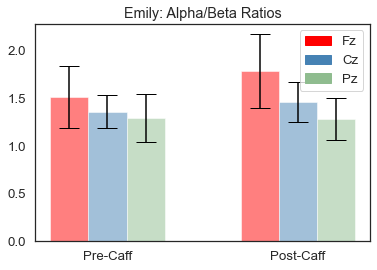

In [102]:
abr_bar_plot(ratio_df)

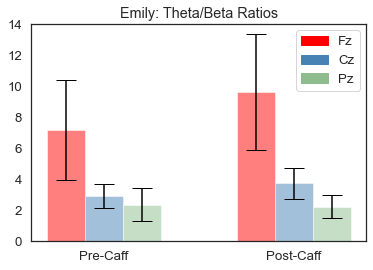

In [104]:
tbr_bar_plot(ratio_df)